In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [344]:
df = pd.read_csv("finalDataset.csv")

In [345]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['HGGS','AGGC', 'HGH2H', 'HGS', 'HGST', 'AGAS', 'AGAST']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])
df.head()

,Unnamed: 0,season,HomeTeam,AwayTeam,HGGS,HGGC,AGGS,AGGC,HGH2H,AGH2H,HGS,HGAS,HGST,HGAST,AGS,AGAS,AGST,AGAST,FTHG,FTAG
0,8,2000-01,Arsenal,Aston Villa,1.062294,0.6578,1.1052,-1.204553,0.361557,0.75,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,1,0
1,9,2001-02,Arsenal,Aston Villa,1.355524,0.5922,1.0922,-1.123576,0.016915,0.25,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,3,2
2,10,2002-03,Arsenal,Aston Villa,1.323328,0.7894,1.1052,-0.879411,1.050842,0.75,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,3,1
3,11,2003-04,Arsenal,Aston Villa,1.746828,0.9868,1.0922,-0.269308,1.740127,1.00,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,2,0
4,12,2004-05,Arsenal,Aston Villa,1.681446,0.9474,1.1052,-0.187713,1.395484,0.75,0.963325,6.6184,1.522749,3.2106,12.6184,0.138509,6.3422,0.258753,3,1


In [346]:
#model = lm.LinearRegression(fit_intercept=False)
model = lm.SGDRegressor(fit_intercept=True)
model

SGDRegressor()

In [347]:
df.head()

,Unnamed: 0,season,HomeTeam,AwayTeam,HGGS,HGGC,AGGS,AGGC,HGH2H,AGH2H,HGS,HGAS,HGST,HGAST,AGS,AGAS,AGST,AGAST,FTHG,FTAG
0,8,2000-01,Arsenal,Aston Villa,1.062294,0.6578,1.1052,-1.204553,0.361557,0.75,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,1,0
1,9,2001-02,Arsenal,Aston Villa,1.355524,0.5922,1.0922,-1.123576,0.016915,0.25,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,3,2
2,10,2002-03,Arsenal,Aston Villa,1.323328,0.7894,1.1052,-0.879411,1.050842,0.75,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,3,1
3,11,2003-04,Arsenal,Aston Villa,1.746828,0.9868,1.0922,-0.269308,1.740127,1.00,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,2,0
4,12,2004-05,Arsenal,Aston Villa,1.681446,0.9474,1.1052,-0.187713,1.395484,0.75,0.963325,6.6184,1.522749,3.2106,12.6184,0.138509,6.3422,0.258753,3,1


In [348]:
df_train = df[df['season']!='2019-20']
df_test = df[df['season']=='2019-20']

In [349]:
df_test.head()

,Unnamed: 0,season,HomeTeam,AwayTeam,HGGS,HGGC,AGGS,AGGC,HGH2H,AGH2H,HGS,HGAS,HGST,HGAST,AGS,AGAS,AGST,AGAST,FTHG,FTAG
16,24,2019-20,Arsenal,Aston Villa,1.420906,0.829,0.6842,1.967120,2.429412,1.00,1.143853,10.579,0.242719,3.921,14.8948,-0.509605,5.2106,-1.464701,3,2
51,68,2019-20,Arsenal,Bournemouth,1.420906,0.829,1.1448,1.276040,2.774054,0.50,1.143853,10.579,0.242719,3.921,14.7632,0.349812,4.9736,-0.602902,1,0
55,73,2019-20,Arsenal,Brighton,1.420906,0.829,0.6842,0.259201,-0.327728,1.00,1.143853,10.579,0.242719,3.921,17.6316,-0.443858,5.0000,-1.388986,1,2
61,79,2019-20,Arsenal,Burnley,1.420906,0.829,0.9474,0.340796,2.774054,0.50,1.143853,10.579,0.242719,3.921,18.1578,-0.415732,5.7368,-1.224889,2,1
90,116,2019-20,Arsenal,Chelsea,1.420906,0.829,1.4868,-1.123576,0.706200,0.75,1.143853,10.579,0.242719,3.921,10.6184,1.232715,3.6842,-0.186325,1,2


In [350]:
X_train = df_train[['HGGS', 'AGGC', 'HGS', 'HGST', 'AGAS', 'AGAST']]
y_train = np.array(df_train[['FTHG']]).ravel()

X_test = df_test[['HGGS', 'AGGC', 'HGS', 'HGST', 'AGAS', 'AGAST']]
y_test = np.array(df_test[['FTHG']]).ravel()

In [351]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [352]:
model.fit(X_train, y_train)
#model.fit(X, y)

SGDRegressor()

In [353]:
model.coef_

array([ 0.24824465,  0.13804935,  0.17047795,  0.03114976, -0.01655409,
       -0.07333243])

In [354]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.09438183746612516
0.144700480616187


In [355]:
a = list(np.round(model.predict(X_test).ravel(), 2))

In [356]:
res = pd.DataFrame()
res['season'] = df_test['season']
res['HomeTeam'] = df_test['HomeTeam']
res['AwayTeam'] = df_test['AwayTeam']
res['Actual FTHG'] = y_test
res['Predicted FTHG'] = a

In [357]:
res.head(10)

,season,HomeTeam,AwayTeam,Actual FTHG,Predicted FTHG
16,2019-20,Arsenal,Aston Villa,3,2.46
51,2019-20,Arsenal,Bournemouth,1,2.29
55,2019-20,Arsenal,Brighton,1,2.22
61,2019-20,Arsenal,Burnley,2,2.22
90,2019-20,Arsenal,Chelsea,1,1.91
99,2019-20,Arsenal,Crystal Palace,2,2.18
122,2019-20,Arsenal,Everton,3,2.09
158,2019-20,Arsenal,Leicester,1,2.13
178,2019-20,Arsenal,Liverpool,2,1.88
197,2019-20,Arsenal,Man City,0,1.71


In [358]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['AGGS','HGGC', 'AGH2H', 'AGS', 'AGST', 'HGAS', 'HGAST']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])
df.head()

,Unnamed: 0,season,HomeTeam,AwayTeam,HGGS,HGGC,AGGS,AGGC,HGH2H,AGH2H,HGS,HGAS,HGST,HGAST,AGS,AGAS,AGST,AGAST,FTHG,FTAG
0,8,2000-01,Arsenal,Aston Villa,1.062294,-1.414208,-0.331747,-1.204553,0.361557,-0.425431,-0.560789,-1.126648,-0.843430,-1.293015,-1.288105,0.016368,-1.363808,-0.441972,1,0
1,9,2001-02,Arsenal,Aston Villa,1.355524,-1.596053,-0.364770,-1.123576,0.016915,-1.317245,-0.560789,-1.126648,-0.843430,-1.293015,-1.288105,0.016368,-1.363808,-0.441972,3,2
2,10,2002-03,Arsenal,Aston Villa,1.323328,-1.049410,-0.331747,-0.879411,1.050842,-0.425431,-0.560789,-1.126648,-0.843430,-1.293015,-1.288105,0.016368,-1.363808,-0.441972,3,1
3,11,2003-04,Arsenal,Aston Villa,1.746828,-0.502214,-0.364770,-0.269308,1.740127,0.020477,-0.560789,-1.126648,-0.843430,-1.293015,-1.288105,0.016368,-1.363808,-0.441972,2,0
4,12,2004-05,Arsenal,Aston Villa,1.681446,-0.611431,-0.331747,-0.187713,1.395484,-0.425431,0.963325,-0.622448,1.522749,-0.523629,0.410419,0.138509,0.528276,0.258753,3,1


In [359]:
#model = lm.LinearRegression(fit_intercept=False)
model = lm.SGDRegressor(fit_intercept=True)
model

SGDRegressor()

In [360]:
df_train = df[df['season']!='2019-20']
df_test = df[df['season']=='2019-20']

In [361]:
X_train = df_train[['AGGS', 'HGGC', 'AGS', 'AGST', 'HGAS', 'HGAST']]
y_train = np.array(df_train[['FTHG']]).ravel()

X_test = df_test[['AGGS', 'HGGC', 'AGS', 'AGST', 'HGAS', 'HGAST']]
y_test = np.array(df_test[['FTAG']]).ravel()

In [362]:
model.fit(X_train, y_train)
#model.fit(X, y)

SGDRegressor()

In [363]:
model.coef_

array([-0.05095738, -0.28283623, -0.09352422,  0.15411003, -0.00602014,
       -0.10125088])

In [364]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.047619392471384914
-0.20760459527122022


In [365]:
a = list(np.round(model.predict(X_test).ravel(), 2))

In [366]:
res['Actual FTAG'] = y_test
res['Predicted FTAG'] = a

In [367]:
res.to_csv("output.csv", index=False)

In [34]:
import statsmodels.api as sm

In [35]:
#x = sm.add_constant(x)

In [36]:
model_sm = sm.GLS(y_train, X_train).fit()
print(model_sm.summary())

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.040
Model:                            GLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              50.41
Date:                Tue, 22 Sep 2020   Prob (F-statistic):                    4.91e-61
Time:                        16:52:48   Log-Likelihood:                         -15124.
No. Observations:                7220   AIC:                                  3.026e+04
Df Residuals:                    7214   BIC:                                  3.030e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              50.41
Date:                Tue, 22 Sep 2020   Prob (F-statistic):                    4.91e-61
Time:                        16:53:08   Log-Likelihood:                         -15124.
No. Observations:                7220   AIC:                                  3.026e+04
Df Residuals:                    7214   BIC:                                  3.030e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [110]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df = pd.read_csv("finalDataset.csv")

In [112]:
df.head()

,Unnamed: 0,season,HomeTeam,AwayTeam,HGGS,HGGC,AGGS,AGGC,HGH2H,AGH2H,HGS,HGAS,HGST,HGAST,AGS,AGAS,AGST,AGAST,FTHG,FTAG
0,8,2000-01,Arsenal,Aston Villa,2.0394,0.6578,1.1052,1.1316,1.50,0.75,10.0000,5.0000,4.0000,2.0000,5.0000,10.0000,2.0000,4.0000,1,0
1,9,2001-02,Arsenal,Aston Villa,2.1578,0.5922,1.0922,1.1578,1.25,0.25,10.0000,5.0000,4.0000,2.0000,5.0000,10.0000,2.0000,4.0000,3,2
2,10,2002-03,Arsenal,Aston Villa,2.1448,0.7894,1.1052,1.2368,2.00,0.75,10.0000,5.0000,4.0000,2.0000,5.0000,10.0000,2.0000,4.0000,3,1
3,11,2003-04,Arsenal,Aston Villa,2.3158,0.9868,1.0922,1.4342,2.50,1.00,10.0000,5.0000,4.0000,2.0000,5.0000,10.0000,2.0000,4.0000,2,0
4,12,2004-05,Arsenal,Aston Villa,2.2894,0.9474,1.1052,1.4606,2.25,0.75,15.7764,6.6184,8.8158,3.2106,12.6184,10.3422,6.3422,4.9736,3,1


In [60]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['HGGS','AGGC', 'HGH2H', 'HGS', 'HGST', 'AGAS', 'AGAST']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])
df.head()

,Unnamed: 0,season,HomeTeam,AwayTeam,HGGS,HGGC,AGGS,AGGC,HGH2H,AGH2H,HGS,HGAS,HGST,HGAST,AGS,AGAS,AGST,AGAST,FTHG,FTAG
0,8,2000-01,Arsenal,Aston Villa,1.062294,0.6578,1.1052,-1.204553,0.361557,0.75,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,1,0
1,9,2001-02,Arsenal,Aston Villa,1.355524,0.5922,1.0922,-1.123576,0.016915,0.25,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,3,2
2,10,2002-03,Arsenal,Aston Villa,1.323328,0.7894,1.1052,-0.879411,1.050842,0.75,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,3,1
3,11,2003-04,Arsenal,Aston Villa,1.746828,0.9868,1.0922,-0.269308,1.740127,1.00,-0.560789,5.0000,-0.843430,2.0000,5.0000,0.016368,2.0000,-0.441972,2,0
4,12,2004-05,Arsenal,Aston Villa,1.681446,0.9474,1.1052,-0.187713,1.395484,0.75,0.963325,6.6184,1.522749,3.2106,12.6184,0.138509,6.3422,0.258753,3,1


In [226]:
x1 = np.array(df[['HGGS']])
x2 = np.array(df[['AGGC']])
x3 = np.array(df[['HGH2H']])
x4 = np.array(df[['HGS']])
x5 = np.array(df[['HGST']])
x6 = np.array(df[['AGAS']])
x7 = np.array(df[['AGAST']])

w0 = random.uniform(-0.1, 0.1)
w1 = random.uniform(-0.1, 0.1)
w2 = random.uniform(-0.1, 0.1)
w3 = random.uniform(-0.1, 0.1)
w4 = random.uniform(-0.1, 0.1)
w5 = random.uniform(-0.1, 0.1)
w6 = random.uniform(-0.1, 0.1)
w7 = random.uniform(-0.1, 0.1)

y = np.array(df[['FTHG']])

epochs = 10000
n = 7600
error = []
iteration = []
y_pred = w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7
# y_pred = w0 + w1*x1 + w2*x2 + w3*x3
#y_pred = w0 + w3*x3

In [227]:
L = 0.0001
for i in range(epochs):
    
    dw0 = -(2/n)*np.sum((y-y_pred))
    dw1 = -(2/n)*np.sum(w1*(y-y_pred))
    dw2 = -(2/n)*np.sum(w2*(y-y_pred))
    dw3 = -(2/n)*np.sum(w3*(y-y_pred))
    dw4 = -(2/n)*np.sum(w4*(y-y_pred))
    dw5 = -(2/n)*np.sum(w5*(y-y_pred))
    dw6 = -(2/n)*np.sum(w6*(y-y_pred))
    dw7 = -(2/n)*np.sum(w7*(y-y_pred))

    
    w0 = w0 - L*dw0
    w1 = w1 - L*dw1
    w2 = w2 - L*dw2
    w3 = w3 - L*dw3
    w4 = w4 - L*dw4
    w5 = w5 - L*dw5
    w6 = w6 - L*dw6
    w7 = w7 - L*dw7
    
    y_pred = w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7
    #y_pred = w0 + w3*x3
    
    error.append((1/n)*np.sum((y_pred - y)**2))
    iteration.append(i)

In [228]:
print(w0)
print(w1)
print(w2)
print(w3)
print(w4)
print(w5)
print(w6)
print(w7)

print("Loss = " + str((1/n)*np.sum((y_pred - y)**2)))

0.4999099826230397
0.13870301708789803
-0.028604695037928896
-0.16793072897213274
0.06979148780572143
-0.17341131718330047
0.12154647780879431
-0.006797504661430498
Loss = 2.021098750794144


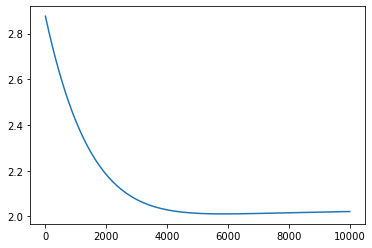

In [229]:
plt.plot(iteration, error)

In [230]:
min(error)

2.0107241357951535

In [231]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y, y_pred), 2))

Mean absolute error = 1.13
Mean squared error = 2.02
Median absolute error = 0.9
Explain variance score = -0.2
R2 score = -0.2


In [202]:
res = pd.DataFrame()
res['season'] = df['season']
res['HomeTeam'] = df['HomeTeam']
res['AwayTeam'] = df['AwayTeam']
res['Actual FTHG'] = df['FTHG']
res['Predicted FTHG'] = list(np.round(y_pred.ravel(), 2))

In [203]:
res.head(10)

,season,HomeTeam,AwayTeam,Actual FTHG,Predicted FTHG
0,2000-01,Arsenal,Aston Villa,1,1.54
1,2001-02,Arsenal,Aston Villa,3,1.53
2,2002-03,Arsenal,Aston Villa,3,1.56
3,2003-04,Arsenal,Aston Villa,2,1.58
4,2004-05,Arsenal,Aston Villa,3,1.57
5,2005-06,Arsenal,Aston Villa,5,1.59
6,2006-07,Arsenal,Aston Villa,1,1.61
7,2007-08,Arsenal,Aston Villa,1,1.59
8,2008-09,Arsenal,Aston Villa,0,1.58
9,2009-10,Arsenal,Aston Villa,3,1.55


In [186]:
res.to_csv("results1.csv", index=False)

In [232]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['AGGS','HGGC', 'AGH2H', 'AGS', 'AGST', 'HGAS', 'HGAST']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])
df.head()

,Unnamed: 0,season,HomeTeam,AwayTeam,HGGS,HGGC,AGGS,AGGC,HGH2H,AGH2H,HGS,HGAS,HGST,HGAST,AGS,AGAS,AGST,AGAST,FTHG,FTAG
0,8,2000-01,Arsenal,Aston Villa,2.0394,-1.414208,-0.331747,1.1316,1.50,-0.425431,10.0000,-1.126648,4.0000,-1.293015,-1.288105,10.0000,-1.363808,4.0000,1,0
1,9,2001-02,Arsenal,Aston Villa,2.1578,-1.596053,-0.364770,1.1578,1.25,-1.317245,10.0000,-1.126648,4.0000,-1.293015,-1.288105,10.0000,-1.363808,4.0000,3,2
2,10,2002-03,Arsenal,Aston Villa,2.1448,-1.049410,-0.331747,1.2368,2.00,-0.425431,10.0000,-1.126648,4.0000,-1.293015,-1.288105,10.0000,-1.363808,4.0000,3,1
3,11,2003-04,Arsenal,Aston Villa,2.3158,-0.502214,-0.364770,1.4342,2.50,0.020477,10.0000,-1.126648,4.0000,-1.293015,-1.288105,10.0000,-1.363808,4.0000,2,0
4,12,2004-05,Arsenal,Aston Villa,2.2894,-0.611431,-0.331747,1.4606,2.25,-0.425431,15.7764,-0.622448,8.8158,-0.523629,0.410419,10.3422,0.528276,4.9736,3,1


In [233]:
x1 = np.array(df[['AGGS']])
x2 = np.array(df[['HGGC']])
x3 = np.array(df[['AGH2H']])
x4 = np.array(df[['AGS']])
x5 = np.array(df[['AGST']])
x6 = np.array(df[['HGAS']])
x7 = np.array(df[['HGAST']])

w0 = random.uniform(-0.1, 0.1)
w1 = random.uniform(-0.1, 0.1)
w2 = random.uniform(-0.1, 0.1)
w3 = random.uniform(-0.1, 0.1)
w4 = random.uniform(-0.1, 0.1)
w5 = random.uniform(-0.1, 0.1)
w6 = random.uniform(-0.1, 0.1)
w7 = random.uniform(-0.1, 0.1)

y = np.array(df[['FTAG']])

epochs = 10000
n = 7600
error = []
iteration = []
y_pred = w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7
# y_pred = w0 + w1*x1 + w2*x2 + w3*x3

In [234]:
L = 0.0001
for i in range(epochs):
    
    dw0 = -(2/n)*np.sum((y-y_pred))
    dw1 = -(2/n)*np.sum(w1*(y-y_pred))
    dw2 = -(2/n)*np.sum(w2*(y-y_pred))
    dw3 = -(2/n)*np.sum(w3*(y-y_pred))
    dw4 = -(2/n)*np.sum(w4*(y-y_pred))
    dw5 = -(2/n)*np.sum(w5*(y-y_pred))
    dw6 = -(2/n)*np.sum(w6*(y-y_pred))
    dw7 = -(2/n)*np.sum(w7*(y-y_pred))


    
    w0 = w0 - L*dw0
    w1 = w1 - L*dw1
    w2 = w2 - L*dw2
    w3 = w3 - L*dw3
    w4 = w4 - L*dw4
    w5 = w5 - L*dw5
    w6 = w6 - L*dw6
    w7 = w7 - L*dw7
    
    y_pred = w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7
#     y_pred = w0 + w1*x1 + w2*x2 + w3*x3
    
    error.append((1/n)*np.sum((y_pred - y)**2))
    iteration.append(i)

In [235]:
print(w0)
print(w1)
print(w2)
print(w3)
print(w4)
print(w5)
print(w6)
print(w7)

print("Loss = " + str((1/n)*np.sum((y_pred - y)**2)))

0.9841047006478788
-0.09945666329172854
0.1113784631754517
-0.2167178468139342
-0.05672465961947315
0.1602108467516054
-0.008674930773432916
-0.1623788030941158
Loss = 1.5064506057311144


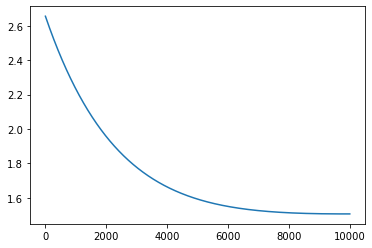

In [236]:
plt.plot(iteration, error)

In [237]:
min(error)

1.5064177164587655

In [238]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y, y_pred), 2))

Mean absolute error = 0.94
Mean squared error = 1.51
Median absolute error = 0.9
Explain variance score = -0.16
R2 score = -0.18


In [239]:
res = pd.DataFrame()
res['season'] = df['season']
res['HomeTeam'] = df['HomeTeam']
res['AwayTeam'] = df['AwayTeam']
res['Actual FTAG'] = df['FTAG']
res['Predicted FTAG'] = list(y_pred.ravel())

In [240]:
res.head(10)

,season,HomeTeam,AwayTeam,Actual FTAG,Predicted FTAG
0,2000-01,Arsenal,Aston Villa,0,1.026088
1,2001-02,Arsenal,Aston Villa,2,1.202390
2,2002-03,Arsenal,Aston Villa,1,1.066718
3,2003-04,Arsenal,Aston Villa,0,1.034312
4,2004-05,Arsenal,Aston Villa,1,1.192978
5,2005-06,Arsenal,Aston Villa,0,1.157832
6,2006-07,Arsenal,Aston Villa,1,1.311499
7,2007-08,Arsenal,Aston Villa,1,1.269425
8,2008-09,Arsenal,Aston Villa,2,1.098019
9,2009-10,Arsenal,Aston Villa,0,0.935357


In [241]:
res.to_csv("results2.csv", index=False)